<a href="https://colab.research.google.com/github/ffedox/nlp/blob/main/Regression_Baselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baselines for R², MAE and RMSE

# 1. Setup

In [4]:
# Modules used in this notebook

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [1]:
# Accessing Drive files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Loading the Grey's Anatomy Dataset

In [5]:
# Already partitioned and preprocessed

data = pd.read_excel('/content/drive/MyDrive/DAR/greys_anatomy_data_train_val_test.xlsx', index_col=0)

train = data[data['data_type'] == 'train']
val   = data[data['data_type'] == 'val']
test  = data[data['data_type'] == 'test']

In [8]:
test.head()

,pp,sp,mc,subtitle_text,data_type
5,0.000000,0.833333,0.166667,what do you got?,test
14,0.000000,0.500000,0.500000,do the graft via keyhole procedure.,test
17,0.000000,0.333333,0.666667,i try not to judge the way that anyone handles,test
29,0.000000,1.000000,0.000000,"oh, you know, actually, the karevs are having",test
32,0.666667,0.000000,0.333333,"but you're used to brain tumor shepherd,",test


# 3. Visualizing Dataset Distributions


## 3.1. Professional Plot

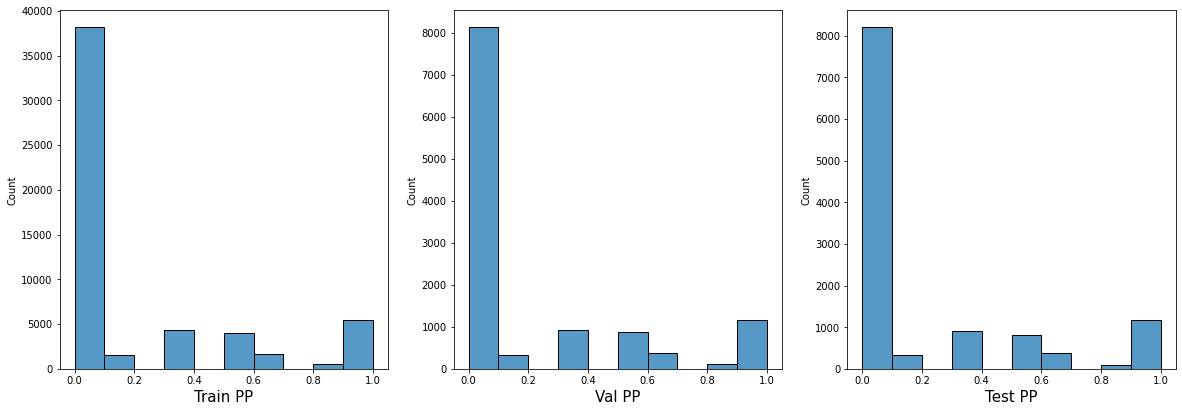

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 6.6))

pp_test = sns.histplot(train['pp'], ax=axs[0], binwidth=0.1);
pp_test.set_xlabel('Train PP', fontsize = 15);

pp_dev = sns.histplot(val['pp'], ax=axs[1], binwidth=0.1);
pp_dev.set_xlabel('Val PP', fontsize = 15);

pp_test = sns.histplot(test['pp'], ax=axs[2], binwidth=0.1);
pp_test.set_xlabel('Test PP', fontsize = 15);

## 3.2. Sentimental Plot

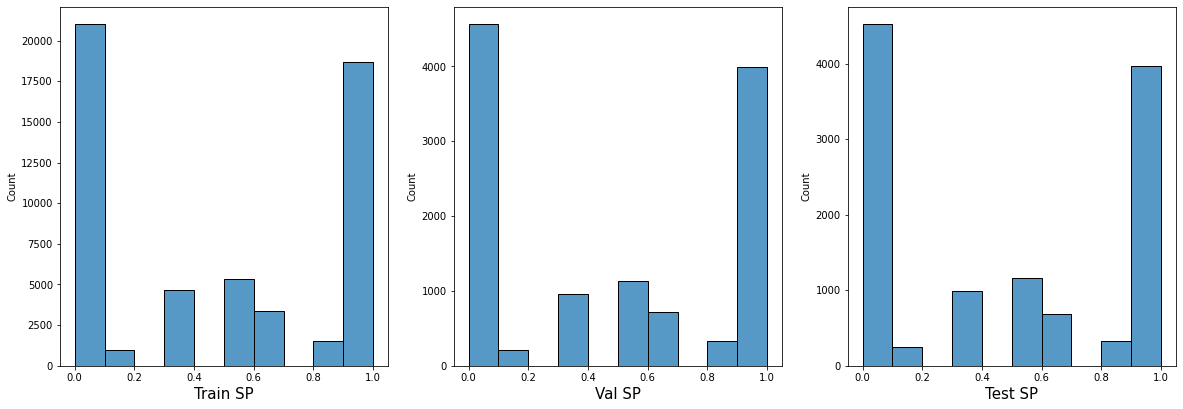

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 6.6))

sp_test = sns.histplot(train['sp'], ax=axs[0], binwidth=0.1);
sp_test.set_xlabel('Train SP', fontsize = 15);

sp_dev = sns.histplot(val['sp'], ax=axs[1], binwidth=0.1);
sp_dev.set_xlabel('Val SP', fontsize = 15);

sp_test = sns.histplot(test['sp'], ax=axs[2], binwidth=0.1);
sp_test.set_xlabel('Test SP', fontsize = 15);

## 3.3. Medical Case

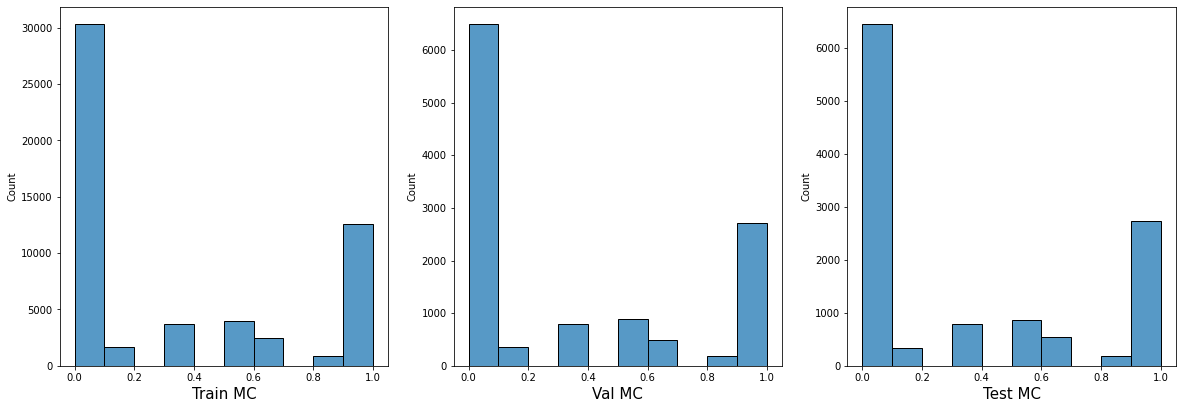

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 6.6))

mc_test = sns.histplot(train['mc'], ax=axs[0], binwidth=0.1);
mc_test.set_xlabel('Train MC', fontsize = 15);

mc_dev = sns.histplot(val['mc'], ax=axs[1], binwidth=0.1);
mc_dev.set_xlabel('Val MC', fontsize = 15);

mc_test = sns.histplot(test['mc'], ax=axs[2], binwidth=0.1);
mc_test.set_xlabel('Test MC', fontsize = 15);

##  3.4. Extracting Counts and Means

In [ ]:
# Professional Plot
print(train['pp'].count(), val['pp'].count(), test['pp'].count())
print(train['pp'].mean(), val['pp'].mean(), test['pp'].mean())
print(train['pp'].median(), val['pp'].median(), test['pp'].median())

# Sentimental Plot
print(train['sp'].count(), val['sp'].count(), test['sp'].count())
print(train['sp'].mean(), val['sp'].mean(), test['sp'].mean())
print(train['sp'].median(), val['sp'].median(), test['sp'].median())

# Medical Case
print(train['mc'].count(), val['mc'].count(), test['mc'].count())
print(train['mc'].mean(), val['mc'].mean(), test['mc'].mean())
print(train['mc'].median(), val['mc'].median(), test['mc'].median())

55567 11907 11908
0.1912556013461227 0.19365359312449257 0.1906141529503975
0.0 0.0 0.0
55567 11907 11908
0.478434442504844 0.4756025867136978 0.47447094390325834
0.5 0.5 0.5
55567 11907 11908
0.3314617188859095 0.33198958595783995 0.3360485947822192
0.0 0.0 0.0


# 4. Baselines

For regression problems, the common rule is to create baseline models that predict the mean or median of the training data output.

## 4.1. RMSE

The most trivial model minimizing squared error is predicting the mean for all the samples. 

In [ ]:
# Initializing an empty array with the shape of the test set

baseline_model = np.zeros((11908, 3))

In [ ]:
# Populating the array with the mean for each class

baseline_model[:, 0] = train['pp'].mean()
baseline_model[:, 1] = train['sp'].mean()
baseline_model[:, 2] = train['mc'].mean()

In [ ]:
# y_test -> the target values of the test set

y_test = data[data.data_type=='test'][['pp', 'sp', 'mc']].values

In [ ]:
# RMSE when always predicting the mean for each class

print('RMSE (ALL) ', mean_squared_error(y_test, baseline_model), ' \n')
print('RMSE (PP): ', list(mean_squared_error(y_test, baseline_model, squared=False, multioutput='raw_values'))[0])
print('RMSE (SP): ', list(mean_squared_error(y_test, baseline_model, squared=False, multioutput='raw_values'))[1])
print('RMSE (MC): ', list(mean_squared_error(y_test, baseline_model, squared=False, multioutput='raw_values'))[2])

RMSE (ALL)  0.1563238957677585  

RMSE (PP):  0.3288642418313142
RMSE (SP):  0.43225877402787743
RMSE (MC):  0.4170999281034543


## 4.2. R2

R-squared (coefficient of determination) measures the variation that is explained by a regression model. R-squared of a regression model is positive if the model's prediction is better than a prediction which is just the mean of the already available y values (ȳ), otherwise it is negative.

A baseline model which always predicts ȳ has an R² of 0.

## 4.4. MAE

The most trivial model minimizing absolute error is predicting the median for all the samples.

In [ ]:
# Initializing an empty array with the shape of the test set

baseline_model = np.zeros((11908, 3))

In [ ]:
# Populating the array with the median for each class

baseline_model[:, 0] = train['pp'].median()
baseline_model[:, 1] = train['sp'].median()
baseline_model[:, 2] = train['mc'].median()

In [ ]:
# MAE when always predicting the median for each class

print('MAE (ALL) ', mean_absolute_error(y_test, baseline_model), ' \n')
print('MAE (PP): ', list(mean_absolute_error(y_test, baseline_model, multioutput='raw_values'))[0])
print('MAE (SP): ', list(mean_absolute_error(y_test, baseline_model, multioutput='raw_values'))[1])
print('MAE (MC): ', list(mean_absolute_error(y_test, baseline_model, multioutput='raw_values'))[2])

MAE (ALL)  0.30753834956891696  

MAE (PP):  0.19061415295039685
MAE (SP):  0.3959523009741342
MAE (MC):  0.3360485947822199


# 5. References

https://stats.stackexchange.com/questions/545979/why-getting-very-high-values-for-mse-mae-mape-when-r2-score-is-very-good

https://stats.stackexchange.com/questions/564723/model-evaluation-r2-score-is-very-bad-when-the-range-of-values-is-low-but-mean

https://stats.stackexchange.com/questions/183265/what-does-negative-r-squared-mean 

https://towardsdatascience.com/baseline-models-your-guide-for-model-building-1ec3aa244b8d

https://stats.stackexchange.com/questions/48267/mean-absolute-error-or-root-mean-squared-error

https://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/

https://stackoverflow.com/questions/68127297/getting-non-zero-value-for-r2-score-when-i-comapre-true-values-with-their-mean

https://towardsdatascience.com/ways-to-evaluate-regression-models-77a3ff45ba70

https://en.wikipedia.org/wiki/Coefficient_of_determination